# Machine Learning Intro
# Brian johnson
# https://github.com/brianjohnsonbdj/datafun-07-ml

## Part 1 - Chart a Straight Line

In [36]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]


## Part 2 - Prediction

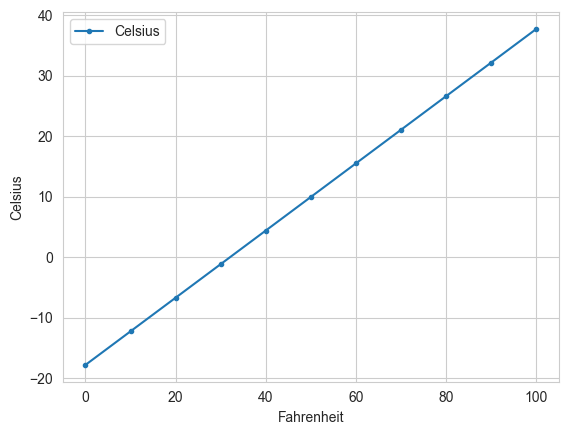

In [37]:
import pandas as pd
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

### create a data frame and set the columns to fahrenheit and celsius.
### Then labelled y axis as celsius

In [38]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


### imported the file as a csv into nyc and then displayed the first 4 values

In [39]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### displayed the last 4 values

In [40]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


### only displayed the first three values in the table

In [41]:
nyc.Date.dtype

dtype('int64')

### displayed the Date as an integer

In [42]:
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### by using floordiv, it removes the month and makes date only have the year

In [43]:
pd.set_option('display.precision', 2)
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### changes the number of decimals used to two and then displays the summary of the data

In [44]:
from scipy import stats
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

### creates a linear regression between date and temperature

## Part 3 - Prediction

In [45]:
linear_regression.slope

np.float64(0.014771361132966163)

In [46]:
linear_regression.intercept

np.float64(8.694993233674289)

In [47]:
linear_regression.slope * 2019 + linear_regression.intercept

np.float64(38.51837136113297)

### displays the prediction for 2019

In [48]:
linear_regression.slope * 1890 + linear_regression.intercept

np.float64(36.612865774980335)

### displays the prediction for 1890

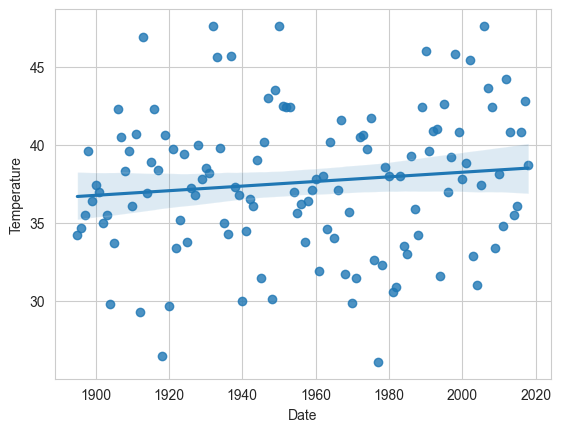

In [49]:
import seaborn as sns
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

In [50]:
axes.set_ylim(10, 70)

(10.0, 70.0)

### created a graph with the best fit line